# enviorment

In [1]:
%matplotlib inline
#%debug 
import csv
import pandas as pd
import numpy as np
import networkx as nx

# material loading

In [2]:
df = pd.read_table("../data/mutation_download_tab.txt",sep="\t")

In [3]:
df

,cancer_project,cancer_type_abbr,tool,driver_gene
0,"Adrenocortical_carcinoma(TCGA,US)",ACC,activedriver,"APC, USF3, TMCC1, CXXC1, CPS1, KIAA1671, ADNP,..."
1,"Adrenocortical_carcinoma(TCGA,US)",ACC,comet,"ANO2, ANK3, STAB1, CLTB, HUWE1, EPG5, CHD2, RB..."
2,"Adrenocortical_carcinoma(TCGA,US)",ACC,dendrix,"NLRP12, GOLGA4, NAV3, UNC13C, CMYA5, CCDC168, ..."
3,"Adrenocortical_carcinoma(TCGA,US)",ACC,driverml,"EXPH5, EML6, TP53, MUC4, NUP188"
4,"Adrenocortical_carcinoma(TCGA,US)",ACC,e-driver,"XIRP2, SVEP1, CSMD3, CCDC168, HMCN1, VWF, GRID..."
...,...,...,...,...
367,"Uveal_melanoma(TCGA,US)",UVM,msea,"EIF1AX, SF3B1, GNAQ, GNA11"
368,"Uveal_melanoma(TCGA,US)",UVM,mutex,"GNAQ, GNA11"
369,"Uveal_melanoma(TCGA,US)",UVM,mutsigcv,"GNA11, HECW2"
370,"Uveal_melanoma(TCGA,US)",UVM,netbox,"BAP1, COL14A1, CYSLTR2, EIF1AX, GNA11, GNAQ, M..."


In [4]:
'''for i in range(len(df)):
    if df.loc['cancer_type_abbr']'''

"for i in range(len(df)):\n    if df.loc['cancer_type_abbr']"

# process by cancer type abbr

In [5]:
df_group=df.groupby(by='cancer_type_abbr',as_index=True)

In [6]:
df_group.get_group(df_group.first().index[])

SyntaxError: invalid syntax (<ipython-input-6-ee532093f9ac>, line 1)

In [7]:
df_group.size()

cancer_type_abbr
ACC     10
BLCA    14
BRCA    14
CESC    12
CHOL     8
COAD    14
DLBC    10
ESCA    12
GBM     12
HNSC    13
KICH     8
KIRC    10
KIRP    10
LAML    11
LGG     11
LIHC    14
LUAD    14
LUSC    13
MESO     7
OV      12
PAAD    10
PCPG    10
PRAD    11
READ    13
SARC    10
SKCM    12
STAD    14
TGCT    10
THCA    10
THYM    10
UCEC    13
UCS     10
UVM     10
dtype: int64

In [8]:
df_group.first().index

Index(['ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'DLBC', 'ESCA', 'GBM',
       'HNSC', 'KICH', 'KIRC', 'KIRP', 'LAML', 'LGG', 'LIHC', 'LUAD', 'LUSC',
       'MESO', 'OV', 'PAAD', 'PCPG', 'PRAD', 'READ', 'SARC', 'SKCM', 'STAD',
       'TGCT', 'THCA', 'THYM', 'UCEC', 'UCS', 'UVM'],
      dtype='object', name='cancer_type_abbr')

## use BRCA test

In [9]:
'''
df_BRCA = df_group.get_group("BRCA").driver_gene
print(df_BRCA)
df_BRCA_list = df_BRCA.str.split(',')
print(df_BRCA_list)
'''

'\ndf_BRCA = df_group.get_group("BRCA").driver_gene\nprint(df_BRCA)\ndf_BRCA_list = df_BRCA.str.split(\',\')\nprint(df_BRCA_list)\n'

In [10]:
'''
df_BRCA_gene = []
for k in df_BRCA_list:
    df_BRCA_gene.extend(k)
#print(df_ACC_gene)
#print(len(df_ACC_gene))
print(len(df_BRCA_gene))
print(len(set(df_BRCA_gene)))
print(df_BRCA_gene)
'''

'\ndf_BRCA_gene = []\nfor k in df_BRCA_list:\n    df_BRCA_gene.extend(k)\n#print(df_ACC_gene)\n#print(len(df_ACC_gene))\nprint(len(df_BRCA_gene))\nprint(len(set(df_BRCA_gene)))\nprint(df_BRCA_gene)\n'

## address on whole cancer type

In [11]:

df_gene_list = []
for i in df_group.first().index:
    df_tmp = df_group.get_group(i).driver_gene
    #print(df_tmp)
    df_tmp = df_tmp.str.split(',')
    list_tmp = []
    for f in df_tmp:
        list_tmp.extend(f)
    df_gene_list.append(list(set(list_tmp)))


In [12]:
print(len(df_gene_list))

33


In [13]:
print(len(df_gene_list[0]))
print(df_gene_list[0])
#但是這邊所做出來的list，裡面並沒有清乾淨

383
[' PHKB', ' CDH4', ' CEP290', ' RIMS2', ' OBSCN', ' DNAH10', ' UNC5C', ' AVPR1A', ' PGK2', ' SP140', ' C9', ' RANBP17', ' UGT2A3', ' FLNA', ' AGBL1', ' PLXNB2', ' KDM7A', ' SRP72', ' CD163L1', ' NELL1', ' ITIH1', ' GOLGA4', ' PCDHB11', ' NLN', ' PCDH7', ' NOTCH3', ' MAP7D3', ' CHD7', ' SCN7A', ' UBR4', ' ATM', ' CSMD3', ' TRPA1', 'XIRP2', ' COL5A2', ' HUWE1', ' SMPD4', ' RTL1', ' PAPPA', ' TTN', ' SPATA31E1', ' ZFPM2', ' COL18A1', ' NUP188', ' NLRP3', ' HK2', ' DNAH5', ' FBN3', ' SI', ' KIAA1671', ' RBM10', ' NEXMIF', ' KMT2A', ' TENM3', ' STAB1', ' RBM27', ' CPS1', ' DCLK1', ' RGSL1', ' CRIM1', ' EPG5', ' APOB', ' FNDC1', ' SRRM2', ' RIMS1', ' CCDC168', ' RP1L1', ' DMD', ' NR2F1', ' VAV3', ' SPTBN5', ' LAMA2', ' EXD2', ' MYLK', ' DNAH3', ' RELN', ' SLCO6A1', ' DNAH17', ' APBA2', ' MAP1B', ' JMJD1C', ' FHAD1', ' SMC3', ' DAXX', ' POLE', ' TFRC', ' VPS13A', ' ITPR3', ' AMER3', 'MUC4', ' ACSL1', ' ZNF804B', ' TTC21A', ' TAF1', ' SCAF4', ' BEND3', 'TMEM247', ' NLRP12', ' NLRP5', ' SLI

In [14]:
#這邊是一種清法
for i in range(len(df_gene_list)):
    for k in range(len(df_gene_list[i])):
        if k==0:
            df_gene_list[i][k] = df_gene_list[i][k].lstrip(' ')
        if k>1:
            df_gene_list[i][k] = df_gene_list[i][k].lstrip(' ')
 

In [15]:
df_gene_list

[['PHKB',
  ' CDH4',
  'CEP290',
  'RIMS2',
  'OBSCN',
  'DNAH10',
  'UNC5C',
  'AVPR1A',
  'PGK2',
  'SP140',
  'C9',
  'RANBP17',
  'UGT2A3',
  'FLNA',
  'AGBL1',
  'PLXNB2',
  'KDM7A',
  'SRP72',
  'CD163L1',
  'NELL1',
  'ITIH1',
  'GOLGA4',
  'PCDHB11',
  'NLN',
  'PCDH7',
  'NOTCH3',
  'MAP7D3',
  'CHD7',
  'SCN7A',
  'UBR4',
  'ATM',
  'CSMD3',
  'TRPA1',
  'XIRP2',
  'COL5A2',
  'HUWE1',
  'SMPD4',
  'RTL1',
  'PAPPA',
  'TTN',
  'SPATA31E1',
  'ZFPM2',
  'COL18A1',
  'NUP188',
  'NLRP3',
  'HK2',
  'DNAH5',
  'FBN3',
  'SI',
  'KIAA1671',
  'RBM10',
  'NEXMIF',
  'KMT2A',
  'TENM3',
  'STAB1',
  'RBM27',
  'CPS1',
  'DCLK1',
  'RGSL1',
  'CRIM1',
  'EPG5',
  'APOB',
  'FNDC1',
  'SRRM2',
  'RIMS1',
  'CCDC168',
  'RP1L1',
  'DMD',
  'NR2F1',
  'VAV3',
  'SPTBN5',
  'LAMA2',
  'EXD2',
  'MYLK',
  'DNAH3',
  'RELN',
  'SLCO6A1',
  'DNAH17',
  'APBA2',
  'MAP1B',
  'JMJD1C',
  'FHAD1',
  'SMC3',
  'DAXX',
  'POLE',
  'TFRC',
  'VPS13A',
  'ITPR3',
  'AMER3',
  'MUC4',
  'ACSL1',


In [16]:
for i in range(len(df_gene_list)):
    print(df_group.first().index[i],len(df_gene_list[i]))

ACC 383
BLCA 2474
BRCA 2213
CESC 1852
CHOL 116
COAD 3972
DLBC 179
ESCA 740
GBM 2041
HNSC 1962
KICH 58
KIRC 749
KIRP 643
LAML 424
LGG 1767
LIHC 1144
LUAD 2974
LUSC 2905
MESO 45
OV 1720
PAAD 993
PCPG 54
PRAD 1171
READ 1860
SARC 555
SKCM 4635
STAD 3789
TGCT 160
THCA 199
THYM 210
UCEC 6830
UCS 244
UVM 40


In [17]:
len(df_gene_list[0])

383

# jaccard index

In [18]:
import os
def x(a):
    return a.lstrip()
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3
def Union(lst1, lst2):
    final_list = lst1 + lst2
    return final_list
write_file_list = []
jaccard_score_matrix=[]
cancer_driver_gene_integrated_by_tool = []
for i in df_group.first().index:
    write_file_list_tmp = []
    jaccard_cancer = []
    list_tmp = []
    df_tmp = df_group.get_group(i).driver_gene
    df_tmp = df_tmp.str.split(', ')
    df_tmp = df_tmp.tolist()
    print(df_tmp)
    print(type(df_tmp))
    print(len(df_tmp))
    #os.system('pause')
    list_tmp.append(df_tmp)
    for n in df_tmp:
        write_file_list_tmp.extend(n)
    write_file_list.append(list(set(write_file_list_tmp)))
    #os.system("pause")
    for k in range(len(df_tmp)):
        for m in range(len(df_tmp)):
            jaccard_tmp = len(intersection(df_tmp[k],df_tmp[m])) / len(Union(df_tmp[k],df_tmp[m]))
            jaccard_cancer.append(jaccard_tmp)
    jaccard_score_matrix.append(jaccard_cancer)
    cancer_driver_gene_integrated_by_tool.append(list_tmp)               
#print(df_tmp)

[['APC', 'USF3', 'TMCC1', 'CXXC1', 'CPS1', 'KIAA1671', 'ADNP', 'COBL', 'C9', 'CTNNB1', 'FOXO1', 'HLTF', 'FADD', 'TRIP13', 'TRPC6', 'SMC4', 'MAP1B', 'RANBP2', 'ASCC3', 'GCN1', 'MDC1', 'CEP170', 'ANKS1A', 'MYH4', 'MYH2', 'CHD7', 'SMPD4', 'TAOK1', 'ARHGAP21', 'ANK3', 'SCAF1', 'PLA2G4A', 'JMJD1C', 'MYO1G', 'TNKS1BP1', 'FHAD1', 'XIRP2', 'FRMD7'], ['ANO2', 'ANK3', 'STAB1', 'CLTB', 'HUWE1', 'EPG5', 'CHD2', 'RBM27', 'PIK3AP1', 'TENM3', 'PCDHA2', 'MYH6', 'RIMS1', 'CUX1', 'FBN1', 'ANK2', 'ATP2B3', 'FAM171B', 'CMYA5', 'RGSL1', 'RP1L1', 'SRRM2', 'UBR4', 'KIRREL1', 'NOTCH3', 'DNAH7', 'NR2F1', 'DNAH6', 'DOCK2', 'PDILT', 'GNAS', 'IRX4', 'IGFN1', 'BEND3', 'GOLGA4', 'KCNH7', 'TENM1', 'HAVCR1', 'PKHD1L1', 'ATRX', 'TG', 'ITIH1', 'ZNF793', 'SMARCAL1', 'KCNH1', 'KIF26B', 'ADAMTS19', 'HIVEP2', 'PCDHGA3', 'PRKAG2', 'WDR44', 'KIAA1109', 'SMC4', 'MED23', 'LAMA1', 'OSMR', 'SIPA1L3', 'CTNNB1', 'TMEM247', 'COL5A2', 'PCDHB9', 'CAPN6', 'LRRD1', 'PLEC', 'ZCCHC6', 'SETBP1', 'HMCN1', 'VPS13A', 'SPATA31E1', 'PKHD1', 'C

[['AR', 'DDB2', 'HK2', 'ITGB4', 'PTEN', 'RYR1', 'HRNR', 'SLC3A2', 'HDAC5', 'USP9X', 'STAG2', 'TOP2A', 'TP53BP1', 'ETS1', 'MAST4', 'RABL6', 'C1QBP', 'ARAF', 'TRIP12', 'CSE1L', 'AHNAK', 'ATP2B1', 'IDH2', 'PFKL', 'PPL', 'PTPRG', 'SLC4A2', 'SUPT6H', 'ZNF91', 'FLT3', 'BRAF', 'ERBB2', 'DLG5', 'ZMYM4', 'CAPN1', 'PYGM', 'FMNL1', 'IDH1', 'HNRNPM', 'NCOR1', 'SOX5', 'MDN1', 'RB1CC1', 'KIF14', 'WDFY3', 'HIC2', 'CEP68', 'SAMD4A', 'ZFR', 'CHD7', 'NAV1', 'INTS2', 'JMJD4', 'ATAD5', 'HNRNPA2B1', 'ASCC2', 'PCDH11X', 'MYO18A', 'SIPA1', 'SYNE2'], ['C3', 'C1S', 'F12', 'CYP2E1', 'LAMB3', 'FGFR2', 'HLA-A', 'CTSD', 'MLXIPL', 'B2M', 'TLN1', 'POR', 'TAP1', 'LAMA5', 'FLNA', 'ITGB4', 'NONO', 'PTPRF', 'CAPN1', 'APP', 'EEF1A1', 'ZYX', 'HLA-DRA', 'HSPA8', 'ATF4', 'PPP1CB', 'CTCF', 'PLCG1', 'STAT1', 'DAXX'], ['AHNAK', 'LRP1', 'ADGRV1', 'BAP1', 'IDH1', 'ALB', 'PBRM1', 'TP53', 'MPDZ', 'FGFR2', 'MUC5B', 'APOB', 'ADAM30', 'EPHA2', 'BCOR', 'KMT2C', 'DNAH5', 'CHD7', 'ARID1A', 'PLXNA4', 'MACF1', 'BIRC6'], ['ARID1A'], ['ADGR

[['APC', 'BLM', 'INSR', 'ITGB4', 'LIG1', 'MYH7', 'NCF1', 'PKLR', 'PTEN', 'UMPS', 'RFX5', 'TEK', 'ATRX', 'TP53', 'TSC2', 'IFNAR1', 'ALOX5', 'ANXA1', 'GRIN2D', 'KCNJ2', 'PTGER4', 'TAGLN', 'MAD2L1BP', 'SREBF1', 'CHEK2', 'WASHC2A', 'MAPKAP1', 'ATN1', 'CUL4A', 'HRNR', 'SLC6A17', 'TNK2', 'SLC3A2', 'ABCF1', 'ARFIP1', 'ARHGAP5', 'TP53BP2', 'RUFY3', 'NCKAP5L', 'TOP2A', 'NFKB2', 'ZAP70', 'CASP8', 'CCDC88C', 'UNK', 'TBX18', 'TOM1L2', 'WDR62', 'CTNND1', 'ACTA1', 'PDS5A', 'COL6A6', 'FLNA', 'SUPT5H', 'LIMA1', 'AP1B1', 'SHC1', 'MYB', 'SSFA2', 'SPAG9', 'TRPC3', 'DNMT1', 'AHI1', 'PABPC4', 'TNPO2', 'TP53BP1', 'USP27X', 'SIN3A', 'SETDB1', 'TJAP1', 'ANK2', 'ANXA4', 'ANXA6', 'RGL3', 'PDCD6IP', 'MYO19', 'DHCR7', 'FLNB', 'MAST4', 'AFF1', 'ABL2', 'CUL7', 'TJP2', 'CHD8', 'EIF4G1', 'PPIE', 'ANKRD44', 'DCAF6', 'GBF1', 'SEC14L1', 'CIT', 'CAMK2B', 'PDE7A', 'ATAD2B', 'GFPT1', 'USP15', 'ANKRD11', 'PLEKHA5', 'GOLGB1', 'FAM193A', 'DNAAF3', 'CIZ1', 'LAYN', 'TTN', 'HYDIN', 'NEB', 'ZNF281', 'WNK2', 'PUM2', 'KIF20B', 'TLK

[['APC', 'FAS', 'ATP7A', 'ESR1', 'GLI3', 'KIT', 'MYH7', 'PCCA', 'PGK1', 'PKD2', 'PTEN', 'TSC1', 'ERCC2', 'ATRX', 'RYR1', 'TP53', 'TSC2', 'ATP4A', 'CYP24A1', 'GSTA3', 'PAM', 'PDE3A', 'PGR', 'ABCB1', 'RAB11FIP1', 'ANXA2', 'THOC5', 'GPATCH8', 'BRPF1', 'ZNF121', 'KDM1A', 'SGO1', 'ZSCAN23', 'SLC3A2', 'EIF2AK4', 'SLTM', 'ABCF1', 'ZNF451', 'ACOT6', 'MARK2', 'USP9X', 'MTMR12', 'TRAK1', 'CSNK1G3', 'TOP2A', 'UBN1', 'U2SURP', 'KDM6B', 'CTNND1', 'HTATIP2', 'USP5', 'SH3RF3', 'ACTA1', 'IMMT', 'ACTB', 'PHF21A', 'ACTN2', 'MYBBP1A', 'UBE4B', 'FLNA', 'SUPT5H', 'LDB1', 'ARHGEF7', 'LIMA1', 'CPS1', 'MTO1', 'CLCN5', 'SSFA2', 'VRK2', 'SPAG9', 'RABL2B', 'PHLDB2', 'NEDD1', 'TCOF1', 'PIP5K1A', 'LRRFIP1', 'TP53BP1', 'OPRM1', 'RPS20', 'ANK2', 'RGL3', 'MYO1B', 'MYO19', 'PPP6R3', 'STAU2', 'EPB41', 'PFKM', 'TTK', 'LEMD3', 'ABL2', 'BCAR1', 'CARMIL1', 'SLC4A11', 'SYK', 'YAF2', 'KANSL1', 'EIF4G1', 'IRF4', 'CCP110', 'GTF2IRD1', 'GBF1', 'NEK1', 'ANO6', 'BZW1', 'GHR', 'HIF1A', 'PXN', 'STX5', 'GFPT1', 'CGNL1', 'CDC6', 'SAM

[['APC', 'ATM', 'KIT', 'MYH7', 'APOB', 'ZNF676', 'TNK2', 'ESCO2', 'ACTBL2', 'SULT1A1', 'ZAP70', 'GAB3', 'CTNND1', 'FLNA', 'ARHGEF3', 'SPIRE1', 'DNMT1', 'PHLDB2', 'SLC12A5', 'TTN', 'CTNNA2', 'MICAL1', 'PEX5', 'ZNF687', 'DYNC1H1', 'AHNAK', 'KPNA2', 'MKI67', 'MYH9', 'USP7', 'IRS4', 'OFD1', 'KHSRP', 'NCOA1', 'IQGAP1', 'DDX10', 'GOLGA2', 'COIL', 'DDX21', 'DDX1', 'NUP214', 'RAD50', 'PRKD3', 'IDH1', 'NUMA1', 'RANBP2', 'CCT4', 'PRPF8', 'PPP1R13L', 'ZFHX3', 'FAF1', 'KAT7', 'SF3B1', 'SART3', 'NUAK1', 'SEC16A', 'ACIN1', 'CDK12', 'MICAL3', 'EHBP1', 'LARP1', 'VIRMA', 'METTL13', 'TERF1', 'PPP1R12C', 'HAUS6', 'BANK1', 'CAND1', 'KIAA1217', 'ASIC1', 'AKR1B10', 'JPH2', 'CGN', 'SHROOM3', 'RET', 'AXL', 'MCL1', 'ZNF335', 'TNS1', 'ACSL4', 'INTS3', 'RPAP3', 'HUWE1', 'CHD6', 'MYPN', 'BRD4', 'LEO1', 'NUF2', 'CKAP2L', 'LSM11', 'DPY19L2', 'ZNF324B'], ['UNC13A', 'ATP2B1', 'SP140', 'TUBGCP6', 'BRINP3', 'FLNC', 'MTFR1', 'TRPM3', 'SRGAP3', 'BMP6', 'NPTX2', 'NCKAP5L', 'JARID2', 'ANKUB1', 'OR5AP2', 'ROBO3', 'FGG', 'PT

[['APC', 'ATM', 'BLM', 'ERCC5', 'ERCC6', 'FANCA', 'MSH6', 'IL2RG', 'INSR', 'KIT', 'MYH7', 'PEX7', 'PGK1', 'PKD2', 'PTEN', 'ATRX', 'KRT14', 'TP53', 'TSC2', 'WRN', 'NOS3', 'ALDH3B1', 'ALDH9A1', 'ANXA1', 'ATP1A1', 'AVPR1A', 'CYP2C19', 'CYP51A1', 'ITGB7', 'LTA4H', 'PAM', 'PDHB', 'RPL22', 'ATP5A1', 'CAPRIN2', 'GPATCH8', 'TWISTNB', 'RREB1', 'SREBF1', 'ENAH', 'TFIP11', 'FAM102B', 'CRMP1', 'RTKN', 'ZHX1', 'HSP90AA1', 'KALRN', 'APLP1', 'WASF1', 'BRMS1', 'USP9X', 'CD79B', 'PCDH17', 'NF1', 'SMC2', 'FGR', 'SLC12A2', 'TOP2A', 'TUBB2A', 'QSER1', 'BCLAF1', 'NFKB2', 'CAMSAP3', 'EPHA6', 'ARRDC5', 'TOM1L2', 'STRN3', 'GIT1', 'ACLY', 'SMARCD2', 'DDX17', 'USP5', 'CCNK', 'PHACTR2', 'ACTN2', 'CORO1C', 'THEMIS2', 'FLNA', 'FANCI', 'LIMA1', 'LSM14A', 'CPS1', 'PPP4R3B', 'BCOR', 'MET', 'BCL6', 'PLCD1', 'ZNF385A', 'GRIN2A', 'PHLDB2', 'AHI1', 'SLC39A8', 'LRRFIP1', 'TP53BP1', 'PRRG1', 'DKC1', 'ETS1', 'GRM5', 'DENND4A', 'MYH14', 'WFS1', 'TDRD3', 'GRAMD2B', 'KDM5D', 'ANK2', 'MTHFSD', 'ZC3H14', 'TNIK', 'TSC1', 'TNRC6B'

[['KIT', 'BRPF1', 'ZNF433', 'MGA', 'GOLGB1', 'COBL', 'SMC3', 'LMNB1', 'RANBP2', 'ANAPC2', 'PELP1', 'TBC1D9', 'VPS13C', 'GPRIN1'], ['CPSF1', 'LAMA5', 'FOXA1', 'ANO7', 'CAPN7', 'TREX1', 'HUWE1', 'NIPBL', 'KNL1', 'CR1', 'EIF4G3', 'PCDH15', 'MACF1', 'AGAP4', 'TACC2', 'KIAA1551', 'DNAH17', 'ZNF277', 'BICD2', 'TENM3', 'DMD', 'ANKRD30A', 'NOTCH3', 'SCN9A', 'GRK1', 'TDRD6', 'VPS13B', 'EDC4', 'ABCF2', 'PCDH7', 'C2orf16', 'PPP1R3A', 'FCGBP', 'HECTD4', 'HIVEP1', 'NDST1', 'NEB', 'ZFC3H1', 'SPHKAP', 'SPTBN5', 'SYNE1', 'ZZEF1', 'COL6A5', 'ATP8A2', 'EPHB4', 'KDM3B', 'ANKRD50', 'PLXNC1', 'SYNJ2', 'FOXP4', 'SSPO', 'GEMIN5', 'SRCAP', 'KIT', 'MDN1', 'FLG', 'ILVBL', 'LRBA', 'CYP1A1', 'CREBBP', 'AC093668.1', 'ZNF217', 'FANCM', 'MAG', 'CACNA1C', 'MAGEB10', 'EPS8L3', 'PTMA', 'ZBTB10', 'ADSS', 'NRAS', 'MTF2', 'UBN1', 'DOCK7', 'CARD10', 'KMT2B', 'GOLGA6L6', 'PDS5A', 'APOB', 'ADAMTSL1', 'TRAM1L1', 'ITGA7', 'RPLP0', 'CNOT3', 'OR1L4', 'LRP1B', 'WASHC2A', 'ZFHX4', 'ARHGAP10', 'COBL', 'CSRNP3', 'EPC2', 'ACOT9', 'KD

[['APC', 'NCF1', 'PTEN', 'AFF3', 'NF1', 'FLNA', 'SUPT5H', 'CPS1', 'AP3D1', 'TTN', 'CHD2', 'WASHC4', 'EPB41L2', 'AHNAK', 'LRP5', 'MAP2', 'MKI67', 'PABPC1', 'DCTN1', 'CREBBP', 'ARHGEF6', 'RANBP2', 'NES', 'CLTCL1', 'DNTTIP2', 'KIAA0753', 'ERCC6L', 'LRP1B', 'GABRB2', 'PI4KA', 'SYNE1', 'LRRK2'], ['PTPRT', 'WDFY3', 'PCDHGA2', 'EPB41L2', 'ROBO2', 'RNF43', 'OR2W3', 'PCDHGB1', 'DST', 'UACA', 'RIMS2', 'ARHGEF25', 'ADAMTSL1', 'PKHD1L1', 'KIAA1217', 'SCN3A', 'NHS', 'ASTN1', 'CACNA1A', 'PLXNB2', 'ZFAT', 'FLNA', 'CFAP47', 'OR4C6', 'NET1', 'FGD6', 'ZC3H6', 'LGR5', 'ZFPM2', 'MAD1L1', 'TP53', 'NCKAP5', 'PTPRM', 'SRRM2', 'ZNF804B', 'SLC20A2', 'ZNF571', 'KANSL3', 'NRAP', 'PRPF8', 'PPP6R3', 'REV3L', 'DNAH9', 'CACNA1H', 'HIP1', 'TRHR', 'ESF1', 'DNAH5', 'NSD1', 'NR3C2', 'ZNF585A', 'TENM3', 'DMD', 'THSD7A', 'MAGEC2', 'FASTKD5', 'TOX', 'KDM5C', 'MOGAT2', 'FMN2', 'GLB1L3', 'PLCL1', 'PIK3C3', 'SACS', 'ADCY2', 'TMUB2', 'HEPHL1', 'ROCK2', 'ZBTB7B', 'GRIA3', 'FREM2', 'LYST', 'MTBP', 'HCFC1', 'MSH6', 'ITGA1', 'IGF2

In [19]:
len(jaccard_score_matrix)

33

In [20]:
print(type(jaccard_score_matrix))
print(jaccard_score_matrix)

<class 'list'>
[[0.5, 0.03287671232876712, 0.02727272727272727, 0.0, 0.018518518518518517, 0.025, 0.03571428571428571, 0.0, 0.02926829268292683, 0.025, 0.03287671232876712, 0.5, 0.3418467583497053, 0.0030120481927710845, 0.037900874635568516, 0.00303951367781155, 0.03188405797101449, 0.0, 0.31781376518218624, 0.0060790273556231, 0.02727272727272727, 0.3418467583497053, 0.5, 0.0053475935828877, 0.04040404040404041, 0.005434782608695652, 0.02, 0.0, 0.2521489971346705, 0.010869565217391304, 0.0, 0.0030120481927710845, 0.0053475935828877, 0.5, 0.047619047619047616, 0.14285714285714285, 0.043478260869565216, 0.0, 0.005813953488372093, 0.0, 0.018518518518518517, 0.037900874635568516, 0.04040404040404041, 0.047619047619047616, 0.5, 0.0, 0.11764705882352941, 0.0, 0.04918032786885246, 0.0, 0.025, 0.00303951367781155, 0.005434782608695652, 0.14285714285714285, 0.0, 0.5, 0.1, 0.0, 0.005917159763313609, 0.25, 0.03571428571428571, 0.03188405797101449, 0.02, 0.043478260869565216, 0.11764705882352941

In [21]:
len(cancer_driver_gene_integrated_by_tool)

33

In [22]:
len(jaccard_score_matrix)

33

# 轉乘對稱矩陣 還有繪圖

In [23]:
print(df_group.first().index)


Index(['ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'DLBC', 'ESCA', 'GBM',
       'HNSC', 'KICH', 'KIRC', 'KIRP', 'LAML', 'LGG', 'LIHC', 'LUAD', 'LUSC',
       'MESO', 'OV', 'PAAD', 'PCPG', 'PRAD', 'READ', 'SARC', 'SKCM', 'STAD',
       'TGCT', 'THCA', 'THYM', 'UCEC', 'UCS', 'UVM'],
      dtype='object', name='cancer_type_abbr')


<ipython-input-33-8a1ac1f8ff84>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig , ax = plt.subplots()


ValueError: num must be 1 <= num <= 1, not 2

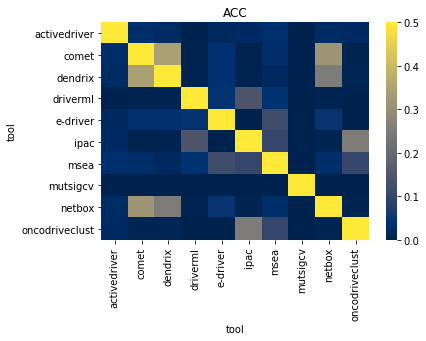

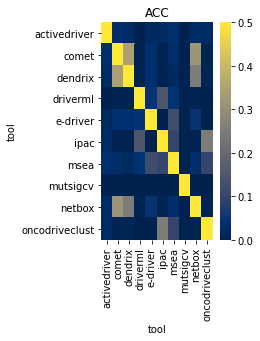

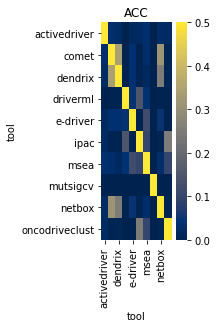

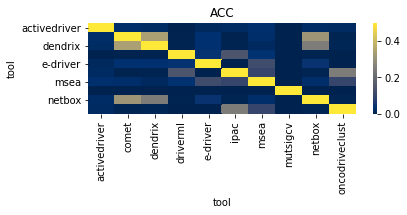

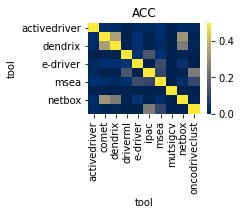

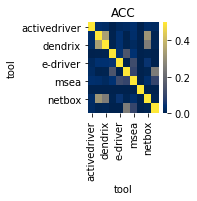

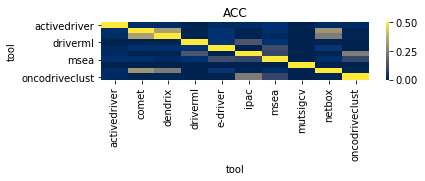

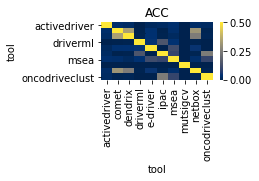

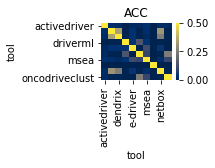

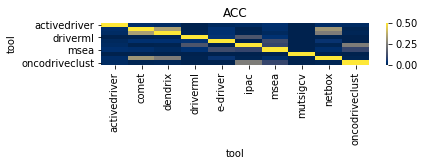

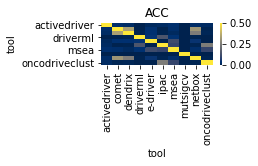

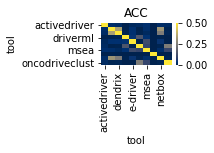

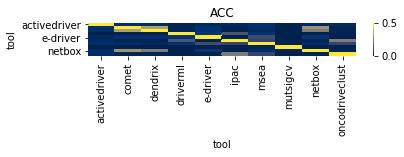

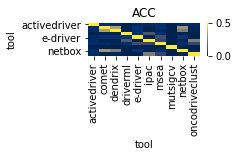

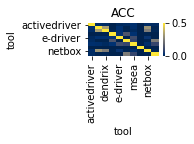

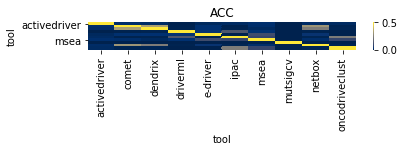

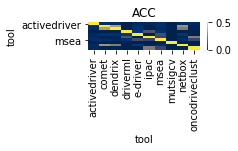

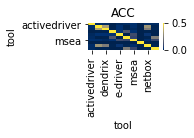

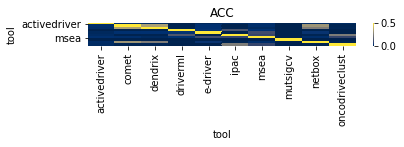

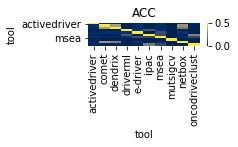

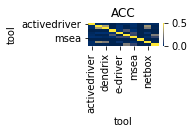

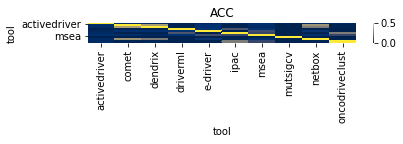

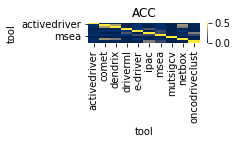

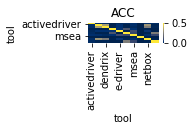

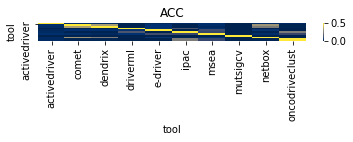

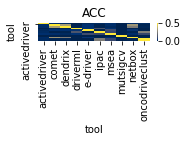

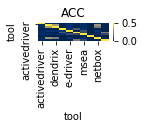

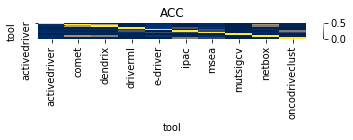

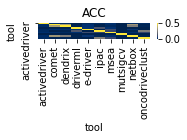

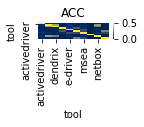

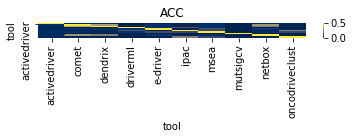

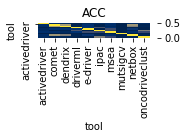

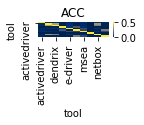

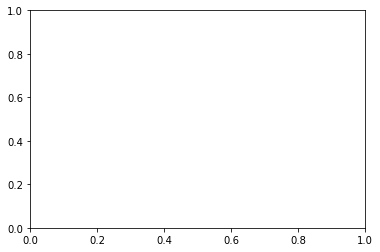

In [33]:

import seaborn as sns
import math
import matplotlib.pyplot as plt

list_cancer_name = list(df_group.first().index)

for i in range(len(jaccard_score_matrix)):
    a = jaccard_score_matrix[0]
    k = int(math.sqrt(len(a)))
    index = df.loc[0:k-1, 'tool']
    a = np.array(a)
    a.resize(k,k)
    data = pd.DataFrame(a,index=index, columns=index)
    for numRow in range(1,12):
        for numCol in range(1,4):
            fig , ax = plt.subplots()
            fig.subplots_adjust(hspace=0.4, wspace=0.4) #設定子圖的間隔
            #plotNum = 1
            plt.subplot(numRow,numCol,i+1)
            plt.title(list_cancer_name[i])
            sns.heatmap(data,cmap="cividis", annot=False)
            #plt.tight_layout()
            #plt.savefig(list_cancer_name[i],)
            #.set(title=str(df_group.first().index[i]))
        #plotNum+=1

In [30]:
'''
for i in range(len(jaccard_score_matrix)):
    a = jaccard_score_matrix[i]
    k = int(math.sqrt(len(a)))
    a = np.array(i)
    a.resize(k,k)
'''

'\nfor i in range(len(jaccard_score_matrix)):\n    a = jaccard_score_matrix[i]\n    k = int(math.sqrt(len(a)))\n    a = np.array(i)\n    a.resize(k,k)\n'

# write cancer type file(寫檔 : 從癌症種類來整合不同工具預測的基因)

In [280]:
print(write_file_list)
for i in range(len(df_group.first().index)):
    file_name='../predict gene_cancer_type_abbr/' + str(df_group.first().index[i]) +'.txt'
    file = open(file_name,'w')
    for k in write_file_list[i]:
        file.write(k)
        file.write('\n')
    file.close()

[['SCN7A', 'LRRD1', 'ITPR3', 'PCDH15', 'NSD1', 'SPTBN5', 'KMT2D', 'SLCO6A1', 'UNC5D', 'LRRC4C', 'MUC4', 'PDILT', 'CYP4A22', 'PITX2', 'CDH23', 'ADGRG4', 'EPG5', 'SMARCAL1', 'NLRP5', 'FLT4', 'GCN1', 'DNAH3', 'RBM12', 'HEPH', 'CUBN', 'RANBP2', 'FAM135B', 'MYO9B', 'ALG13', 'ALOX5', 'TIAM1', 'AVPR1A', 'SRP72', 'MXRA5', 'SMC3', 'PTPRD', 'TMEM247', 'TWISTNB', 'PHKB', 'HERC2', 'ADAMTS19', 'FLNA', 'KIF1A', 'SETD5', 'VWF', 'CTNNB1', 'RANBP17', 'DAXX', 'MYO18B', 'FAM81B', 'DNAH6', 'CST9', 'SMC4', 'STAB1', 'KAT6A', 'PAK3', 'TMEM2', 'ADGRV1', 'ZNF804B', 'PEG3', 'LRP4', 'TGM6', 'MDC1', 'TMCC1', 'EHMT1', 'WDR45', 'MACF1', 'HRNR', 'DSCAM', 'PCDHB5', 'CYFIP2', 'FAT1', 'RP1L1', 'MME', 'ST18', 'KMT2C', 'AKAP12', 'KDM7A', 'LAMA2', 'VPS13A', 'SCAF1', 'LRP1', 'FRMD7', 'SYNE1', 'ADAMTS17', 'C12orf65', 'ZNF831', 'TTLL5', 'PIK3AP1', 'SYNE2', 'CDKL5', 'SLC4A11', 'APBA2', 'CHD2', 'ZNF793', 'WDFY4', 'NR2F1', 'PRX', 'RP1', 'NEB', 'ABCC11', 'FLG', 'NAV3', 'EGFLAM', 'TRPC6', 'FBN3', 'DAB2', 'TENM3', 'BCORL1', 'VCAN'

# chi-square test analysis

In [290]:
from scipy.stats import chisquare

是使用cgc or ncg 做total 還是使用全部的predict driver gene做total，還是只是兩個gene來做total

# process by tool

In [14]:
 df_tool_group=df.groupby(by='tool',as_index=True)

In [15]:
df_tool_group.size()

tool
activedriver      32
comet             21
dawnrank          21
dendrix           33
driverml          31
drivernet         14
e-driver          32
ipac              32
memo              15
msea              33
mutex             16
mutsigcv          33
netbox            28
oncodriveclust    31
dtype: int64

In [21]:
print(len(df_tool_group.first().index))
df_tool_group.first().index

14


Index(['activedriver', 'comet', 'dawnrank', 'dendrix', 'driverml', 'drivernet',
       'e-driver', 'ipac', 'memo', 'msea', 'mutex', 'mutsigcv', 'netbox',
       'oncodriveclust'],
      dtype='object', name='tool')